 Task-1

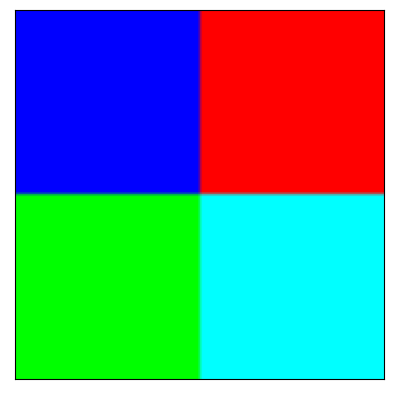

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Img1 = np.zeros((50,50,3) , dtype= "uint8") #first image
Img1[:] =[255,0,0] # BGR --> Blue image
Img2 = np.zeros((50,50,3) , dtype= "uint8") #second Image
Img2[:] =[0,0,255] # BGR -- > Red Image
Img3 = np.zeros((50,50,3) , dtype= "uint8") #Third Image
Img3[:] =[0,255,0] # BGR -- > Green Image
Img4 = np.zeros((50,50,3),dtype="uint8") # fourth Image
Img4[:] = (255,255,0) # BGR --> yellow Image
FirstRow=np.hstack((Img1,Img2))
SecondRow = np.hstack((Img3,Img4))
Img=np.vstack((FirstRow,SecondRow)) # adding two rows
Img=cv.resize(Img,(200,200)) #resize (100,100) to (200,200)
Img =cv.cvtColor(Img,cv.COLOR_BGR2RGB)
plt.imshow(Img)
plt.xticks([])
plt.yticks([])
plt.show()

Task-2

In [13]:
import numpy as np
import cv2 as cv


flag=0
save=0
vidsave =0
i=0
f=0
r=0
h=0
fourcc= cv.VideoWriter_fourcc(*'XVID')
videofile='output_video.avi'
out = cv.VideoWriter(videofile,fourcc,20.0,(640,480))
cap=cv.VideoCapture(0)
cap.set(4,640)
cap.set(3,480)
while True :
    success, frame = cap.read()
    cv.imshow("Frames",frame)
    d=cv.waitKey(1)
                            #check on clicks
    if d == ord('S') :
        vidsave = 'S'
    elif d == ord('R')  :
        cv.destroyAllWindows()
        flag ='R'
    elif d==ord('Z') :
        cv.destroyAllWindows()
        flag ='Z'
    elif d==ord('H') :
        cv.destroyAllWindows()
        flag ='H'
    elif d==ord('X') :
        cv.destroyAllWindows()
        flag ='X'
    elif d==ord ('G'):
        cv.destroyAllWindows()
        flag ='G'
    elif d==ord ('C'):
        save ='C'
    elif d == ord('Q'):
        cv.destroyAllWindows()
        flag = 'Q'
    else :                  # if not pressed on  any key so the will check on flags :D
        if flag =='G':
            Gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
            cv.imshow("Grayscale",Gray_frame)
            if save == 'C' : #if want to take screenshot
                i=+1
                cv.imwrite('Resources/Gray_image'+str([i]) +'.png',Gray_frame)
            save=0
            if vidsave == 'S' : #if want to take video capture 
                Gray_frame = cv.cvtColor(Gray_frame,cv.COLOR_GRAY2BGR)
                out.write(Gray_frame)
        elif flag =='H' :
            HSV_frame = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
            cv.imshow("HSV",HSV_frame)
            if save == 'C':
                h+=1
                cv.imwrite('Resources/HSV_image' + str([h]) + '.png', HSV_frame)
            save=0
            if vidsave == 'S' :
                out.write(HSV_frame)
        elif flag == 'R' :
            rotated_frame = cv.rotate(frame, cv.ROTATE_90_CLOCKWISE)
            cv.imshow("Rotated",rotated_frame)
            if save == 'C' :
                r+= 1
                cv.imwrite('Resources/Rotated_image' + str([r]) + '.png', rotated_frame)
            save =0
            if vidsave == 'S' :
                rotated_frame=cv.resize(rotated_frame,(480,640))
                out.write(rotated_frame)
        elif flag == 'Q' :
            if vidsave == 'S' :
                out.release()
            cap.release()
            cv.destroyAllWindows()  
            break
        elif flag == 'Z' :
            cv.imshow("Original", frame)
            if save == 'C' :
                f+=1
                cv.imwrite('Resources/Original_image' + str([f]) + '.png', frame)
            save = 0
            if vidsave == 'S' :
                out.write(frame)
        elif flag == 'X':
            cv.imshow("Rotated", rotated_frame)
            cv.imshow("Grayscale", Gray_frame)
            cv.imshow("HSV", HSV_frame)
            cv.imshow("Original", frame)
            if save =='C':
                i+=1
                h+=1
                f+=1
                r+=1
                cv.imwrite('Resources/Gray_image' + str([i]) + '.png', Gray_frame)
                cv.imwrite('Resources/Hsv_image' + str([h]) + '.png', HSV_frame)
                cv.imwrite('Resources/rotated_image' + str([r]) + '.png', rotated_frame)
                cv.imwrite('Resources/Original_image' + str([f]) + '.png', frame)
            save=0
            if vidsave == 'S':
               print("Can't save video in this mode --> select mode from (R,G,H,Z) :D")
            vidsave=0   




Task-3

In [14]:
import cv2 as cv
from matplotlib import pyplot as plt
import math

Img=cv.imread("Resources/Grid.PNG") # current position is (50,90)
Img=cv.resize(Img,(480,240))  # resized it because i don't know what is the real scale of the image i got it as a screenshot
Speed=float(input("Enter the speed in 'm/s' :"))# Speed = Time ? angle ?
Time =float(input("Enter the time in 'Hr' :"))
Angle=float(input("Enter the angle in 'degree' :"))
Distance = Speed*(Time*3.6) #distance in km
y2=int(Distance*(math.cos((Angle*(math.pi)/180))))   # distance in y axis
x2=int(Distance*(math.sin((Angle*(math.pi)/180))))   # distance in x axis
y2=int(y2*10/2) #callibrating both x and y for each 10 pixels == 2km distance
x2=int(x2*10/2)
y2=90-y2
x2=x2+50
if (x2 >480 or y2>240) : #check for availability
    print("out of range")
else :
    cv.rectangle(Img,(x2,y2),(x2+10,y2+10),(0,0,255),-1)
    cv.line(Img,(55,95),(x2+5,y2+5),3)
    Img=cv.cvtColor(Img,cv.COLOR_BGR2RGB)
    plt.imshow(Img)
    plt.show()

Task - 4

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
counter =0 
circles=np.zeros((30,2),dtype ="int") #make array of circles drawen
def mousepoints(event,x,y,flags,params) : #function to detect mouse clicks
    global counter
    if event == cv.EVENT_LBUTTONDOWN : #detect left click
        circles[counter]=x,y
        counter+=1
    if event == cv.EVENT_RBUTTONDBLCLK :
        for x in range (counter) :
            circles[x] = (0,0)
        counter = 0    
    if event == cv.EVENT_RBUTTONDOWN :
        counter-=1
        circles[counter]=(0,0)

while True:
    Img = np.zeros((500, 500, 3), dtype="uint8") #make blank image to draw on it 
    for x in range (counter) :
      Img=cv.circle(Img, circles[x], 15, (0, 0, 255), 3)
    cv.putText(Img, "Press Single Right Click to Clear last Circle", (50, 400), cv.FONT_HERSHEY_SIMPLEX, 0.5,(0, 255, 0), 2) #put text on image
    cv.putText(Img, "Press Double Right click to clear all Circles", (50, 420), cv.FONT_HERSHEY_SIMPLEX, 0.5,(0, 255, 0), 2) #put text on image
    cv.imshow("Img",Img)
    cv.setMouseCallback("Img", mousepoints) #call back function
    if cv.waitKey(1) & 0xFF == ord('q') :
        break  
   
cv.destroyAllWindows()    

Task-5

In [12]:
import numpy as np
import cv2 as cv
circles = np.zeros((4,2),dtype="int")
counter = 0
def mousepoints(event,x,y,flags,params) :
    global counter
    if event == cv.EVENT_LBUTTONDOWN :
        circles[counter]=x,y
        counter+=1
        print (circles)



Img = cv.imread("Resources/jhonsmith.jpg") # read image 
Img = cv.resize(Img,(700,300)) # resize real image 
Out = Img
while True:
    ImgStacked=np.vstack([Img,Out]) #stack real image with output one 
    cv.imshow("ImgStacked", ImgStacked) 
    cv.setMouseCallback("ImgStacked", mousepoints )
    if counter == 4 :
         width , height = Img.shape[1],Img.shape[0] #make image with same dimension of real one 
         pts1 = np.float32((circles[0],circles[1],circles[2],circles[3]))
         pts2= np.float32(([0,0],[width,0],[0,height],[width,height]))
         Mat= cv.getPerspectiveTransform(pts1,pts2) #transform the points
         Out=cv.warpPerspective(Img,Mat,(width,height))
    for x in range (counter) :
       Img=cv.circle(Img,(circles[x]),5,(0,255,0),-1)
    if cv.waitKey(1) & 0xFF == ord('q') :
        break
cv.destroyAllWindows()    







